### ガボールフィルタによるエッジ抽出

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def BGR2GRAY(img):
    # Grayscale
    gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
    return gray


# Gabor
def gabor_filter(K_size=111, sigma=10, gamma=1.2, Lambda=10,  psi=0, angle=0):
    #get half size
    d = K_size//2
    
    # prepare kernel
    gabor = np.zeros((K_size, K_size), dtype=np.float32)
    
    # each value
    for y in range(K_size):
        for x in range(K_size):
            # distance from center
            px = x - d
            py = y - d
            
            # degree -> radian
            theta = angle/180.*np.pi
            
            # get kernel x
            _x = np.cos(theta)*px + np.sin(theta)*py
            # get kernel y
            _y = -np.sin(theta)*px + np.cos(theta)*py
            
            # fill kernel
            gabor[y,x] = np.exp(-(_x**2+gamma**2*_y**2) / (2*sigma**2)) * np.cos(2*np.pi*_x/Lambda + psi)
            
            
    # kernel normalization
    gabor /= np.sum(np.abs(gabor))
    
    return gabor


def gabor_filtering(gray, K_size=111, sigma=10, gamma=1.2, Lambda=10,  psi=0, angle=0):
    # get shape
    H,W = gray.shape
    
    # padding
    gray = np.pad(gray, (K_size//2, K_size//2), 'edge')

    # prepare out image
    out = np.zeros((H,W), dtype=np.float32)
    
    # get gabor filter
    gabor = gabor_filter(K_size, sigma, gamma, Lambda,  psi, angle)
    
    # filtering 
    for y in range(H):
        for x in range(W):
            out[y,x] = np.sum(gray[y:y+K_size, x:x+K_size]*gabor)
            
    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)
    
    return out


def gabor_process(img):
    # gray scale
    gray = BGR2GRAY(img).astype(np.float32)
    
    # define angle
    As = [0,45, 90, 135]
    
    # prepare pyplot
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0,wspace=0.2)
    
    # each angle
    for i, A in enumerate(As):
        # gabor filtering
        out = gabor_filtering(gray, K_size=11, sigma=1.5, gamma=1.2, Lambda=3,  psi=0, angle=A)
        
        plt.subplot(1,4,i+1)
        plt.imshow(out, cmap='gray')
        plt.axis('off')
        plt.title('Angle '+str(A))
        
    cv2.imwrite('out79.png')
    plt.show()
    
    

TypeError: imwrite() missing required argument 'img' (pos 2)

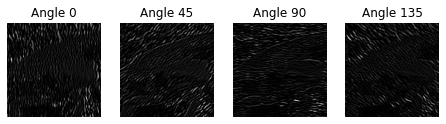

In [16]:
img = cv2.imread('../imori.jpg').astype(np.float32)

gabor_process(img)
